# `aisim` -- Simulations for light-pulse atom interferometry

## Installation

```
git clone https://github.com/bleykauf/aisim.git
cd aisim
python setup.py install
```

Alternatively, if you plan to make changes to the code, use

```
python setup.py develop
```

## Usage

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import aisim as ais

Checking the currently installed version:

In [2]:
print(ais.__version__)

0+untagged.3.g9eaff82.dirty


## Examples

### Effect of wavefront aberrations in atom interferometry

As an example, we reproduce two plots from the paper https://link.springer.com/article/10.1007/s00340-015-6138-5.

#### GAIN timing and parameters

In [3]:
T = 260 # ms
t1 = 129.972 # ms 
t2 = t1 + T # ms
t3 = t2 + T # ms
t_det = 778 # ms
t = [t_det, t1, t2, t3]

r_beam = 11 # mm

#### Loading and preparing wavefront data

Wavefront aberration in multiples of $\lambda$ = 780 nm. 

Load Zernike coefficients from file:

In [4]:
coeff_window2 = np.loadtxt('data/wf_window2.txt')
coeff_window5 = np.loadtxt('data/wf_window5.txt')

Creating `Wavefront` objects and removing piston, tip and tilt from the data:

In [5]:
wf2 = ais.beam.Wavefront(r_beam, coeff_window2)
wf5 = ais.beam.Wavefront(r_beam, coeff_window5)
for n in [0,1,2]:
    wf2.coeff[n] = 0
    wf5.coeff[n] = 0

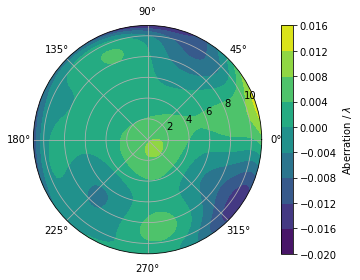

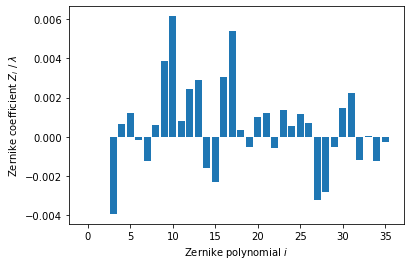

In [6]:
wf2.plot()
fig, ax = wf2.plot_coeff()

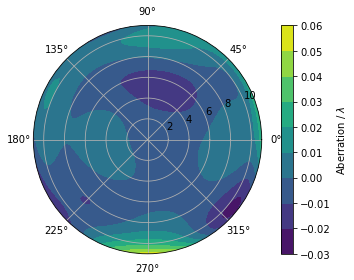

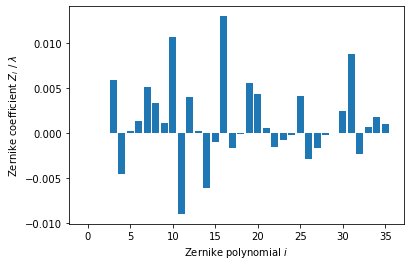

In [7]:
wf5.plot()
fig, ax = wf5.plot_coeff()

#### Simulation the bias in gravity from wavefront aberrations

In [8]:
awf_win2 = []
awf_win5 = []
r_dets = np.linspace(2, 10, 10)
for r_det in r_dets:
    awf_win2.append(ais.sims.mz_interferometer(t, wf2, r_det=r_det))
    awf_win5.append(ais.sims.mz_interferometer(t, wf5, r_det=r_det))

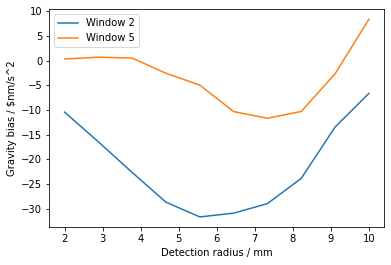

In [9]:
fig, ax = plt.subplots()
ax.plot(r_dets, ais.convert.rad_to_grav(np.angle(awf_win2)), label='Window 2')
ax.plot(r_dets, ais.convert.rad_to_grav(np.angle(awf_win5)), label='Window 5')
ax.set_xlabel('Detection radius / mm')
ax.set_ylabel('Gravity bias / $nm/s^2');
ax.legend()